# 首先学习曲线的绘制

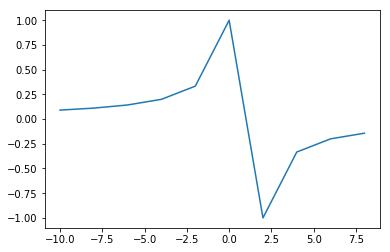

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#定义x轴坐标,步长为2
x=np.arange(-10,10,2)
#y是一个二次曲线
#y1=10*x+3
#y2=0.1*np.square(x)+3
y3=1/(1-x)
#plt.plot(x,y1)
#plt.plot(x,y2)
plt.plot(x,y3)

plt.show()


# 我们学习3维函数图的绘制
试着修改里面的数字和函数看看图形有什么变化

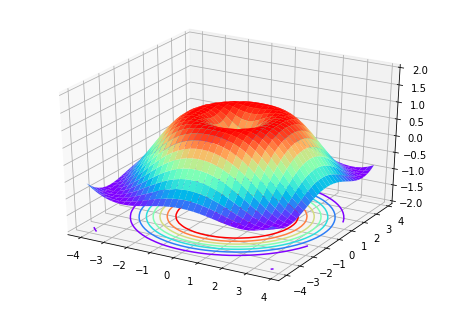

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z= np.sin(R)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

# 绘制从3D曲面到底部的投影
ax.contour(X, Y, Z, offset = -2, cmap = 'rainbow')

# 设置z轴的维度
ax.set_zlim(-2, 2)

plt.show()


# 异或函数 
（看两个数是否相同，相同为0，不同为1）
## x 0 0 1 1
## y 0 1 0 1
## xy异或的结果是
## z 0 1 1 0


# 请画出异或函数的三维图

[0 1]
[0 1]
[[False  True]
 [ True False]]


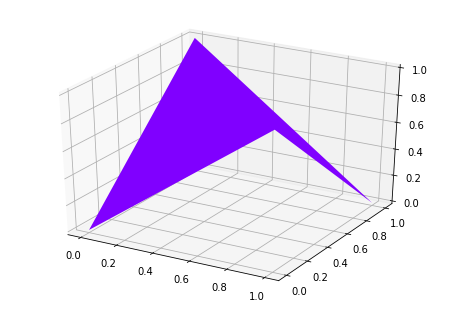

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
  

fig = plt.figure()
ax = Axes3D(fig)

X=np.arange(0,2,1)
Y=np.arange(0,2,1)
print(X)
print(Y)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
Z = np.logical_xor(X,Y)
print(Z)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
plt.show()


# 挑战：

试画出以下两个函数的曲线

def nonlin(x): 
    return 1/(1+np.exp(-x))  

def nonlin_derive(x): 
    return 1/(1-x)  

##请在下面写出你的代码

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# put your code here


# 下面，我们用神经网络来学习这个函数

# Annotations for the Sirajology Python NN Example

This code comes from a demo NN program from the YouTube video https://youtu.be/h3l4qz76JhQ. The program creates an neural network that simulates the [XOR (exclusive OR)](https://en.wikipedia.org/wiki/XOR_gate) function with two inputs and one output. 



In [2]:
import numpy as np  # Note: there is a typo on this line in the video

The following is a function definition of the sigmoid function, which is the type of non-linearity chosen for this neural net. It is not the only type of non-linearity that can be chosen, but is has nice analytical features and is easy to teach with. In practice, large-scale deep learning systems use piecewise-linear functions because they are much less expensive to evaluate. 

The implementation of this function does double duty. If the deriv=True flag is passed in, the function instead calculates the derivative of the function, which is used in the error backpropogation step. 

# 首先，定义一个sigmod函数

In [51]:
def nonlin(x, deriv=False):  # Note: there is a typo on this line in the video
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))  # Note: there is a typo on this line in the video

# 神经元网络的基础，激励sigmoid函数。
声音太大或太小都没有意义，只是中间那段我们很敏感

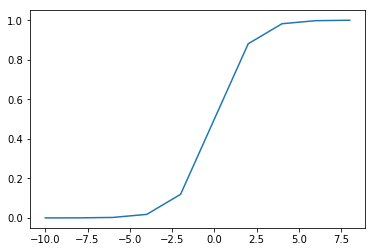

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
#print(x)
y=nonlin(x)
#print(y)

plt.plot(x,y)
plt.show()


The following code creates the input matrix. Although not mentioned in the video, the third column is for accommodating the bias term and is not part of the input. 

In [ ]:
# 输入参数的所有变化范围以及偏移量选定

In [62]:
#input data
X = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])


The output of the exclusive OR function follows. 

# 监督学习的输出结果

In [63]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

Z =y

The seed for the random generator is set so that it will return the same random numbers each time, which is sometimes useful for debugging.

In [81]:
np.random.seed(1)

Now we intialize the weights to random values. syn0 are the weights between the input layer and the hidden layer.  It is a 3x4 matrix because there are two input weights plus a bias term (=3) and four nodes in the hidden layer (=4). syn1 are the weights between the hidden layer and the output layer. It is a 4x1 matrix because there are 4 nodes in the hidden layer and one output. Note that there is no bias term feeding the output layer in this example. The weights are initially generated randomly because optimization tends not to work well when all the weights start at the same value. Note that neither of the neural networks shown in the video describe the example. 

In [82]:
#synapses
syn0 = 2*np.random.random((3,4)) - 1  # 3x4 matrix of weights ((2 inputs + 1 bias) x 4 nodes in the hidden layer)
syn1 = 2*np.random.random((4,1)) - 1  # 4x1 matrix of weights. (4 nodes x 1 output) - no bias term in the hidden layer.

This is the main training loop. The output shows the evolution of the error between the model and desired. The error steadily decreases. 

# 第一步
随机选定权值，看看输出

#第一层
4个神经元
每个神经元针对3个输入各有一套3权值随机生成。 

In [83]:
print(syn0)
print(syn1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


# 用第一个数据计算目前的输出

In [84]:
print(X[0])

[0 0 1]


先算第一层第一个神经元接受到的输入，权值如下

In [85]:
print(syn0[:,0])

[-0.16595599 -0.70648822 -0.20646505]


In [86]:
w0vector=X[0]*syn0[:,0]
print(w0vector)

[-0.         -0.         -0.20646505]


# 然后求加权和

# 这样得出了第一层第一个神经元在输入为0 0 偏置为1时的输出

In [87]:
w0=sum(w0vector)
print(w0)

-0.206465051539


# 然后进入激发函数，太大太小都饱和处理，不大不小线性处理

In [89]:
l1=nonlin(w0)
print(l1)

0.448566316246


# 同理得出第一层第二个

In [93]:
w1=sum(X[0]*syn0[:,1])
l1=nonlin(w1)
print(l1)

0.519398625093


# 可以一次性利用numpy里的点积（dot）计算，也就是加权求和计算，得出第一层4个神经元在输入为0，0，偏置为1时的值

In [96]:
l1=nonlin(np.dot(X[0],syn0))
print(l1)

[ 0.44856632  0.51939863  0.45968497  0.59156505]


# 然后计算第二层的输出

In [98]:
l2=nonlin(np.dot(l1,syn1))
print(l2)

[ 0.47372957]


# 我们期待的输出值是多少呢？

In [99]:
print(y[0])

[0]


# 误差是

In [101]:
l2_error=y[0]-l2
print(l2_error)

[-0.47372957]


# 利用误差修正第二层权值网络

In [105]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [106]:
print(l2_delta)

[[-0.00064963]
 [ 0.00081722]
 [ 0.00074366]
 [-0.00096423]]


# 计算第一层的误差

In [119]:
l1_error = l2_delta.dot(syn1.T)
print(l1_error)

[[ 0.000384   -0.00049128  0.00061405 -0.00022148]
 [-0.00048305  0.00061801 -0.00077245  0.00027862]
 [-0.00043958  0.00056238 -0.00070293  0.00025354]
 [ 0.00056995 -0.00072918  0.00091141 -0.00032874]]


# 计算第一层的修正值

In [121]:
l1_delta = l1_error * nonlin(l1,deriv=True)
print(l1_delta)

[[  9.49829336e-05  -1.22633883e-04   1.52514256e-04  -5.35137018e-05]
 [ -1.19485307e-04   1.54269263e-04  -1.91857758e-04   6.73184206e-05]
 [ -1.08731309e-04   1.40384616e-04  -1.74590045e-04   6.12595822e-05]
 [  1.40980109e-04  -1.82021523e-04   2.26371999e-04  -7.94286640e-05]]


# 修正权值网络

In [122]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

In [123]:
print(syn0)
print(syn1)

[[-0.16592374  0.44060735 -0.99971947 -0.39535302]
 [-0.70646672 -0.81535056 -0.62744506 -0.30889066]
 [-0.20645731  0.07762347 -0.16159853  0.37043464]]
[[-0.591191  ]
 [ 0.75613938]
 [-0.94532031]
 [ 0.34083952]]


# 作业：验算一下权值网络修正过的输入输出

In [ ]:
#put your code here

# 练习：计算一下输入为0 1时的输出以及误差，偏置选1 ....

In [8]:
#training step
# Python2 Note: In the follow command, you may improve 
#   performance by replacing 'range' with 'xrange'. 
for j in range(60000):  
    
    # Calculate forward through the network.
    l0 = X
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    if(j % 10000) == 0:   # Only print the error every 10000 steps, to save time and limit the amount of output. 
        print("Error: " + str(np.mean(np.abs(l2_error))))
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print("Output after training")
print(l2)
    
    

Error: 0.496410031903
Error: 0.00858452565325
Error: 0.00578945986251
Error: 0.00462917677677
Error: 0.00395876528027
Error: 0.00351012256786
Output after training
[[ 0.00260572]
 [ 0.99672209]
 [ 0.99701711]
 [ 0.00386759]]


In [ ]:
l2 = nonlin(np.dot(l1, syn1))
    

# 求 0 XOR 0 
0,0,偏置1

See how the final output closely approximates the true output [0, 1, 1, 0]. If you increase the number of interations in the training loop (currently 60000), the final output will be even closer. 

In [61]:
#X[0]=np.array([0,0,1])
print(X[0])

[0 1]


In [1]:
%%HTML
#The following line is for embedding the YouTube video 
#   in this Jupyter Notebook. You may remove it without peril. 
<iframe width="560" height="315" src="https://www.youtube.com/embed/h3l4qz76JhQ" frameborder="0" allowfullscreen></iframe>